<a href="https://colab.research.google.com/github/reban87/ML-Projects/blob/main/CNN_SMOKE_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pathTrain="/content/drive/MyDrive/Smoke Detection/"

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [ ]:
#image_folder=['Cloud','Dust','Haze','Land','Seaside','Smoke']
labels = ['Cloud','Dust','Haze','Land','Seaside','Smoke']
#image size with 512 and 256 crashed the computation
img_size = 224
def get_data():
    data = [] 
    for label in labels: 
        path = os.path.join(pathTrain, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img)) #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_data()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


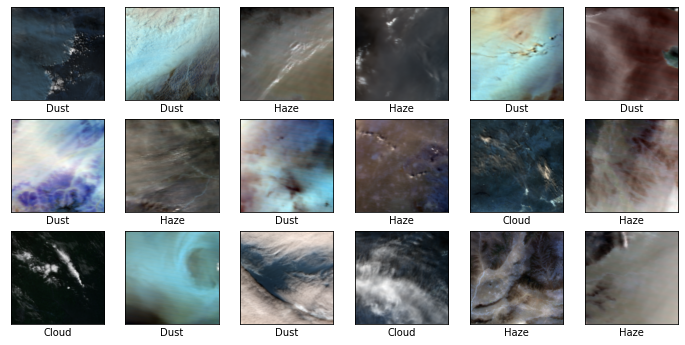

In [ ]:
#plot random images from train dataset
from random import seed
from random import randint
plt.figure(figsize=(12,12))
for i in range(18): 
  value = randint(0, 3000)   
  plt.subplot(6,6,i+1)    
  plt.xticks([])    
  plt.yticks([])    
  plt.grid(False)
  plt.imshow(train[value][0], cmap=plt.cm.binary)    
  plt.xlabel(labels[train[value][1]])
plt.show()

In [ ]:
x = []
y = []

for feature, label in train:
  x.append(feature)
  y.append(label)

# Normalize the data
x = np.array(x)
x.reshape(-1,img_size,img_size,1)
y = np.array(y)

print("x",x.shape)
print("y",y.shape)

x (6225, 224, 224, 3)
y (6225,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2)
print("Training X Data Shape:", X_train.shape)
print("Testing X Data Shape:", X_test.shape)
print("Validation X Data Shape:", X_validation.shape)
print("Training y Data Shape:", y_train.shape)
print("Testing y Data Shape:", y_test.shape)
print("Validation y Data Shape:", y_validation.shape)

Training X Data Shape: (4481, 224, 224, 3)
Testing X Data Shape: (623, 224, 224, 3)
Validation X Data Shape: (1121, 224, 224, 3)
Training y Data Shape: (4481,)
Testing y Data Shape: (623,)
Validation y Data Shape: (1121,)


In [ ]:
#use the image data generator to import the images from the datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataGen=ImageDataGenerator(rescale=1./255, 
                                 rotation_range=30,
                                 zoom_range=0.4,
                                 horizontal_flip=True)


In [ ]:
dataGen1=ImageDataGenerator(rescale=1./255
                                 )

In [ ]:
dataGen.fit(X_train)
dataGen1.fit(X_test)
dataGen1.fit(X_validation)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 224,224, 3)
X_test = X_test.reshape(X_test.shape[0], 224,224, 3)
X_val= X_val.reshape(X_val.shape[0],224,224, 3)

In [ ]:
# Import necessary library for CNN Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
# 1. Create a Model
model1= Sequential([
      Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),MaxPooling2D(2,2),
      Conv2D(32,(3,3), activation='relu'), MaxPooling2D(2,2),
      Conv2D(64,(3,3),activation='relu'),
      Conv2D(64,(3,3),activation='relu'),
      MaxPooling2D(2,2),
      Conv2D(128,(3,3),activation='relu'),
      Conv2D(128,(3,3),activation='relu'),
      MaxPooling2D(2,2),
      Conv2D(256,(3,3),activation='relu'),
      Conv2D(256,(3,3),activation='relu'),
      Conv2D(256,(3,3),activation='relu'),
      MaxPooling2D(2,2),
      Flatten(),
      Dense(512,activation='relu'),
      Dense(512,activation='relu'),
      Dense(6,activation='softmax'),
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        3

In [ ]:
# 2. Compile the Model
model1.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# 3. Fit the Model
history=model1.fit(X_train,y_train,
                   epochs =50,
                   validation_data=(X_validation,y_validation), shuffle=True) 

Epoch 1/50
141/141 [==============================] - 18s 125ms/step - loss: 1.6467 - accuracy: 0.2923 - val_loss: 1.3541 - val_accuracy: 0.5004
Epoch 2/50
141/141 [==============================] - 16s 115ms/step - loss: 1.4592 - accuracy: 0.3490 - val_loss: 1.3772 - val_accuracy: 0.3408
Epoch 3/50
141/141 [==============================] - 16s 116ms/step - loss: 1.3886 - accuracy: 0.3780 - val_loss: 1.2736 - val_accuracy: 0.4523
Epoch 4/50
141/141 [==============================] - 16s 115ms/step - loss: 1.2873 - accuracy: 0.4486 - val_loss: 1.3763 - val_accuracy: 0.4862
Epoch 5/50
141/141 [==============================] - 16s 116ms/step - loss: 1.1454 - accuracy: 0.5256 - val_loss: 1.1501 - val_accuracy: 0.5370
Epoch 6/50
141/141 [==============================] - 16s 115ms/step - loss: 1.0714 - accuracy: 0.5646 - val_loss: 1.0730 - val_accuracy: 0.5941
Epoch 7/50
141/141 [==============================] - 16s 115ms/step - loss: 1.0409 - accuracy: 0.5805 - val_loss: 1.0162 - val_ac

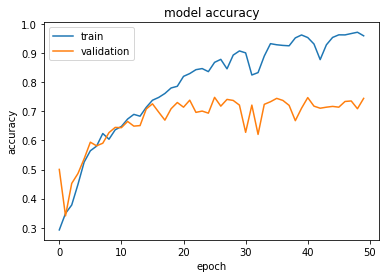

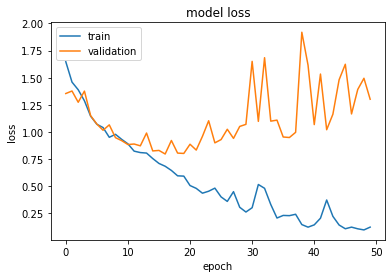

In [ ]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Crete a Confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10),text_size=15):

  #Create the confusion matrix
  cm=confusion_matrix(y_true,tf.round(y_pred))
  cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #normalize our confusion matrix
  n_classes=cm.shape[0]

  #Let's prettify it
  fig, ax=plt.subplots(figsize=figsize)
  #Create a matrix plot
  cax=ax.matshow(cm,cmap=plt.cm.Reds)
  fig.colorbar(cax)

  # Set labels to be classes

  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  #label the axes
  ax.set(title="confusion matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #set x-axis label to the  buttom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different color
  threshold = (cm.max() + cm.min()) / 2.

  #Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j]>threshold else "black",
            size = text_size)


In [ ]:
model_results = model1.evaluate(X_validation,y_validation)
print("Overall Loss:  " + "%.2f" % model_results[0])
print("Overall Accuracy:  " + "%.2f" % model_results[1])

36/36 [==============================] - 1s 38ms/step - loss: 1.3016 - accuracy: 0.7449
Overall Loss:  1.30
Overall Accuracy:  0.74


In [ ]:
y_pred=model1.predict(X_test)
y_pred

array([[4.70632643e-01, 1.05239931e-04, 1.11413836e-04, 5.24360001e-01,
        4.03401064e-05, 4.75038262e-03],
       [2.06733688e-08, 5.29977910e-07, 4.26565592e-08, 4.58706322e-14,
        4.09532913e-05, 9.99958396e-01],
       [5.96959202e-04, 6.98019794e-05, 9.67379776e-04, 9.81204510e-01,
        1.62480152e-04, 1.69988777e-02],
       ...,
       [1.91458254e-04, 4.65177036e-05, 3.67451023e-04, 6.81575795e-04,
        3.26510100e-03, 9.95447814e-01],
       [3.66666370e-07, 9.97051597e-01, 5.50189470e-05, 1.36931645e-04,
        2.12263665e-03, 6.33468095e-04],
       [3.42507155e-05, 5.67571442e-06, 3.22062551e-04, 2.10836224e-04,
        1.38263043e-04, 9.99288797e-01]], dtype=float32)

In [ ]:
y_pred[:10]

array([[4.7114111e-07, 7.6837961e-05, 9.9990594e-01, 7.1322138e-06,
        7.4864914e-09, 9.5021533e-06],
       [4.9671102e-03, 5.8283733e-04, 4.1006100e-05, 5.7015795e-06,
        2.4466689e-03, 9.9195659e-01],
       [8.3558859e-07, 6.7999053e-07, 1.1863277e-07, 1.4628755e-07,
        6.5424067e-01, 3.4575748e-01],
       [8.6524728e-04, 8.1160236e-03, 4.9970865e-01, 1.6830476e-03,
        1.9390751e-03, 4.8768798e-01],
       [9.9957365e-01, 1.5735812e-07, 1.6253156e-10, 3.6386919e-04,
        7.0803623e-07, 6.1595092e-05],
       [1.7418774e-02, 1.2809748e-04, 1.7426999e-03, 9.0582127e-04,
        5.3232990e-04, 9.7927231e-01],
       [8.0546439e-02, 1.5225193e-03, 2.3876674e-02, 2.6093416e-03,
        1.6702868e-02, 8.7474221e-01],
       [2.0014813e-20, 4.2512074e-19, 5.8779837e-23, 3.4562485e-18,
        9.9999666e-01, 3.3705237e-06],
       [9.6352174e-05, 9.7022444e-01, 2.6970727e-02, 2.0016232e-03,
        1.0066997e-04, 6.0623296e-04],
       [7.5150659e-08, 2.5774190e-07,

In [ ]:
#Let's convert all the prediction probabilities into integer
y_preds=y_pred.argmax(axis=1)

In [ ]:
y_preds[:10]

array([3, 5, 3, 2, 0, 4, 5, 4, 1, 5])

In [ ]:
y_test[:10]

array([3, 5, 3, 2, 0, 4, 3, 4, 1, 3])

In [ ]:
#let's draw the simple confusion matrix to visualize it
confusion_matrix(y_preds,y_test)

array([[95,  4,  3, 13,  1, 21],
       [ 0, 72, 17,  6,  1,  6],
       [ 2, 15, 62,  7,  0,  9],
       [ 8,  3,  1, 71,  0,  3],
       [ 2,  2,  0,  1, 96,  4],
       [12,  4, 10,  8,  4, 60]])

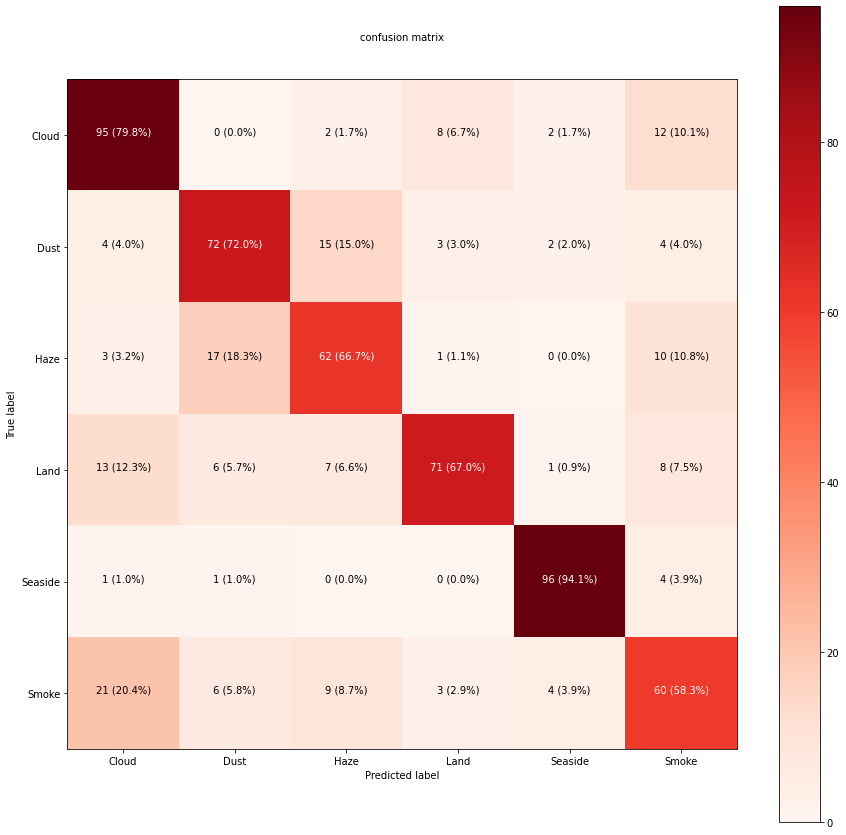

In [ ]:
# Lets make it more prettier
import tensorflow as tf
import numpy as np
make_confusion_matrix(y_true=y_test,
                      y_pred=y_preds,
                      classes=labels,
                      figsize=(15,15),
                      text_size=10)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       119
           1       0.71      0.72      0.71       100
           2       0.65      0.67      0.66        93
           3       0.83      0.67      0.74       106
           4       0.91      0.94      0.93       102
           5       0.61      0.58      0.60       103

    accuracy                           0.73       623
   macro avg       0.73      0.73      0.73       623
weighted avg       0.73      0.73      0.73       623



In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_preds)

0.6777629455726901

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_preds)

2.524879614767255

In [ ]:
mean_absolute_error(y_test,y_preds)

0.7207062600321027

In [ ]:
import math
MSE = np.square(np.subtract(y_test,y_preds)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

1.5889869775323067


In [ ]:
!pip install shap 

     |████████████████████████████████| 564 kB 5.3 MB/s 


import shap
import tensorflow as tf
imageNumber=1
explainer = shap.GradientExplainer(model1, X_train)

# we explain the model's predictions on the first three samples of the test set
shap_values = explainer.shap_values(X_test[imageNumber:imageNumber+1])

In [ ]:
import shap
# since we have two inputs we pass a list of inputs to the explainer
explainer = shap.GradientExplainer(model1, X_train)
imageNumber=3

# we explain the model's predictions on the first three samples of the test set
shap_values = explainer.shap_values(X_test[imageNumber:imageNumber+1])

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

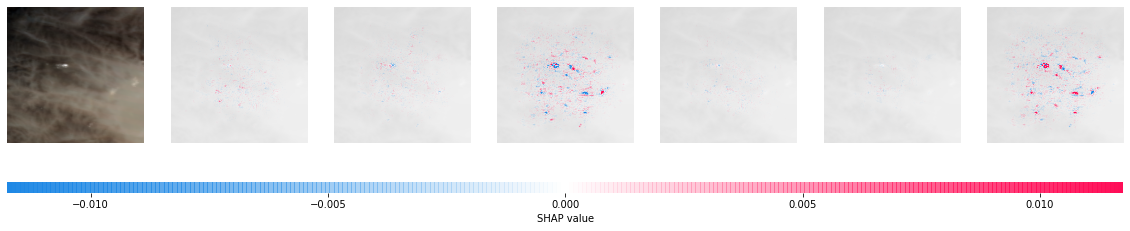

In [ ]:
shap.image_plot([shap_values[i] for i in range(6)], X_test[imageNumber:imageNumber+1])

The image belongs to the class 3 i.e Haze as we can verifiy from the
 `y_preds[:10]`and `y_test[:10]`.. It is clearly seen that the model have confusion between haze and the smoke.....

In [ ]:
X_train = X_train.astype('double')
X_test = X_test.astype('double')

Float image out of standard range; displaying image with stretched contrast.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


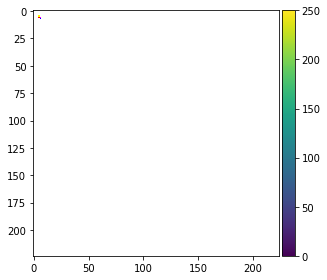

In [ ]:
import skimage.io 
import skimage.segmentation
Xi= X_test[imageNumber]
skimage.io.imshow(Xi) # Show image before inception preprocessing

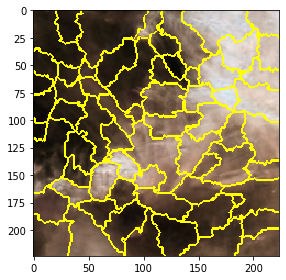

In [ ]:
skimage.io.imshow(skimage.segmentation.mark_boundaries(X_test[imageNumber], superpixels))

In [ ]:
num_perturb = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations[0] #Show example of perturbation

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
import copy

def perturb_image(img,perturbation,segments):
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]
  return perturbed_image

Float image out of standard range; displaying image with stretched contrast.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


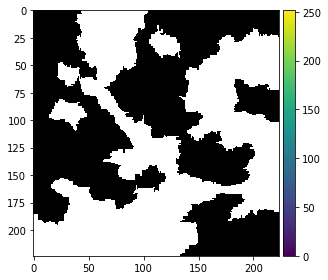

In [ ]:
skimage.io.imshow(perturb_image(X_test[imageNumber],perturbations[0],superpixels))